# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


In [1]:
# Kamil Zaborniak
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## ten kod sluzy do wizualizacji funkcji, nie trzeba go czytać dla zrozumienia reszty wykładu
class FunctionTracker:
    def __init__(self, func):
        self.func = func
        self.x_values = []
        self.y_values = []
        self.f_values = []

    def add_point(self, x, y):
        self.x_values.append(x)
        self.y_values.append(y)
        self.f_values.append(self.func(x, y))

    def plot(self):
        # Generate mesh for the surface plot
        x_plot = np.linspace(-3.5, 3.5, 100)
        y_plot = np.linspace(-3.5, 3.5, 100)
        X, Y = np.meshgrid(x_plot, y_plot)
        Z = self.func(X, Y)

        # Create Plotly figure
        fig = go.Figure(data=[
            go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8),
            go.Scatter3d(
                x=self.x_values,
                y=self.y_values,
                z=self.f_values,
                mode='lines+markers',
                marker=dict(size=4, color='red'),
                line=dict(color='red', width=2)
            )
        ])

        # Update plot layout
        fig.update_layout(
            title='Wizualizacja wędrówki',
            scene=dict(
                xaxis_title='x',
                yaxis_title='y',
                zaxis_title='f(x, y)',
                aspectmode='cube'
            ),
            autosize=False,
            width=800,
            height=600,
        )
        fig.show()

- (a)

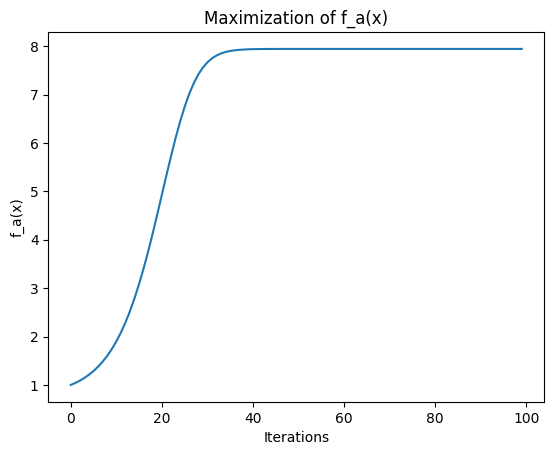

In [2]:
import torch
import matplotlib.pyplot as plt

def f_a(x):
    return -x**4 + 4*x**2 - 2*x + 1

x = torch.tensor(0.0, dtype=torch.float, requires_grad=True)  # x_0 = 0

learning_rate = 0.01
num_iters = 100
values = []

for i in range(num_iters):
    y = f_a(x)
    y.backward()
    with torch.no_grad():
        x += learning_rate * x.grad
    x.grad.zero_()
    values.append(y.item())

plt.plot(range(num_iters), values, label="Convergence of f_a(x)")
plt.xlabel("Iterations")
plt.ylabel("f_a(x)")
plt.title("Maximization of f_a(x)")
plt.show()

- (b)

In [ ]:
def f_b(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

x = torch.tensor(0.0, dtype=torch.float, requires_grad=True)
y = torch.tensor(0.0, dtype=torch.float, requires_grad=True)
z = torch.tensor(0.0, dtype=torch.float, requires_grad=True)
learning_rate = 0.01
num_iters = 100
values = []

for i in range(num_iters):
    v = f_b(x, y, z)
    v.backward()
    with torch.no_grad():
        x += learning_rate * x.grad
        y += learning_rate * y.grad
        z += learning_rate * z.grad
        x.grad.zero_()
        y.grad.zero_()
        z.grad.zero_()
    values.append((x.item(), y.item(), z.item()))

path = torch.tensor(values)

# 3D interactive plot
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=path[:, 0],
    y=path[:, 1],
    z=path[:, 2],
    mode='lines',
    marker=dict(size=5, color='blue'),
    line=dict(color='blue', width=2),
    name="Optimization Path"
))
fig.update_layout(
    title="Optimization Path for f_b",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()


## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [ ]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

X = torch.tensor(X, dtype=torch.float32).view(-1,1)
y = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [43]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)

def gradient_descent_train(model, X, y, learning_rate=0.01,
                           criterion=nn.MSELoss(),
                           num_epochs=1000):
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  MSE_hostory = []
  for epoch in range(num_epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    MSE_hostory.append(loss.item())

  return MSE_hostory

In [44]:
model_1d = LinearRegressionModel()
loss_hist = gradient_descent_train(model_1d,
                                   X, y)
a = model_1d.linear.weight.item()
b = model_1d.linear.bias.item()

X_true = torch.linspace(-10, 10, 100).view(-1,1)
y_pred = model_1d(X_true)
y_pred = y_pred.detach().numpy()
y_true = 3 * X_true.numpy() + 4

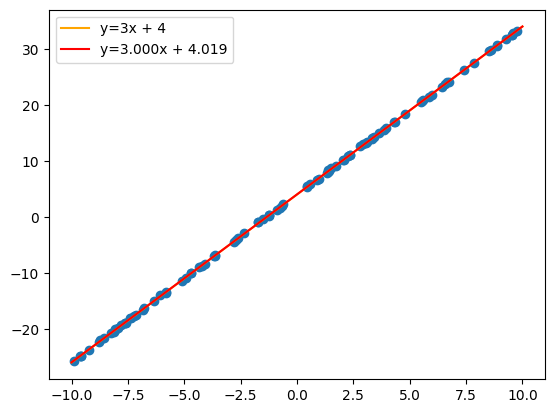

In [45]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_true, y_true, c='orange', label='y=3x + 4')
plt.plot(X_true, y_pred, c='red', label=f'y={a:.3f}x + {b:.3f}')
plt.legend()
plt.show()

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


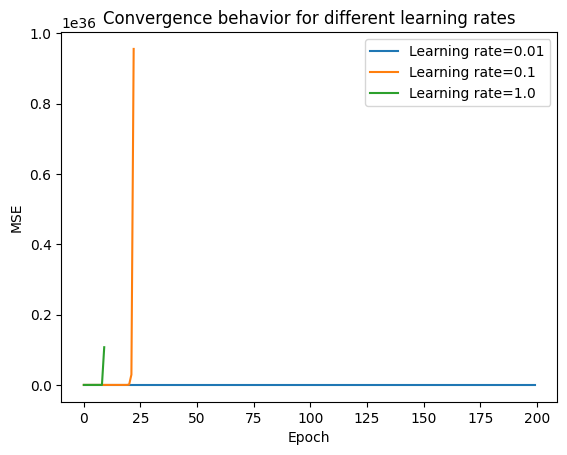

In [46]:
loss_hist_001 = gradient_descent_train(LinearRegressionModel(),
                                       X=X,y=y,
                                       learning_rate=1e-2, num_epochs=200)
loss_hist_01 = gradient_descent_train(LinearRegressionModel(),
                                      X=X,y=y,
                                      learning_rate=1e-1, num_epochs=200)
loss_hist_1 = gradient_descent_train(LinearRegressionModel(),
                                     X=X,y=y,
                                     learning_rate=1, num_epochs=200)

plt.plot(range(len(loss_hist_001)), loss_hist_001, label='Learning rate=0.01')
plt.plot(range(len(loss_hist_01)), loss_hist_01, label='Learning rate=0.1')
plt.plot(range(len(loss_hist_1)), loss_hist_1, label='Learning rate=1.0')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Convergence behavior for different learning rates")
plt.legend()
plt.show()

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [47]:
import numpy as np
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


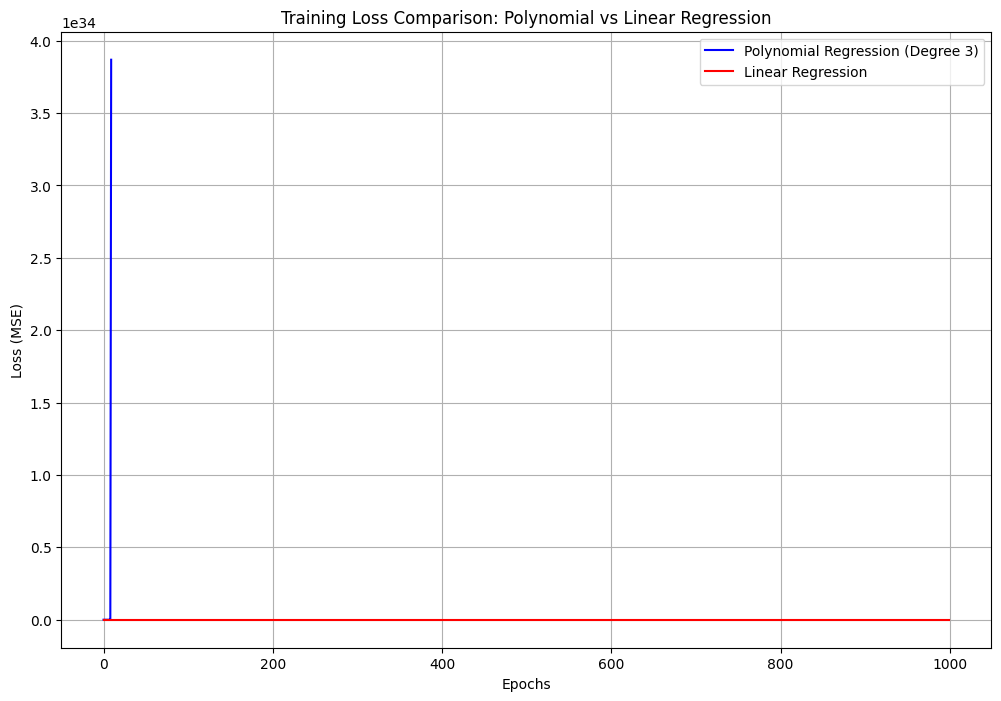

In [145]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1,1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

class PolynomialModel(torch.nn.Module):
    def __init__(self, degree):
        super(PolynomialModel, self).__init__()
        self.poly = torch.nn.Linear(degree, 1)

    def forward(self, x):
        return self.poly(x)

def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree)
    return torch.tensor(poly.fit_transform(X), dtype=torch.float32)

X_poly = generate_polynomial_features(X_tensor, degree=3)

poly_model = PolynomialModel(degree=4)
linear_model = LinearRegressionModel()

def train_model(model, X_train, y_train, epochs=1000, learning_rate=0.01):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

poly_losses = train_model(poly_model, X_poly, y_tensor)
linear_losses = train_model(linear_model, X_tensor, y_tensor)


plt.figure(figsize=(12, 8))
plt.plot(poly_losses, label="Polynomial Regression (Degree 3)", color='blue')
plt.plot(linear_losses, label="Linear Regression", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Comparison: Polynomial vs Linear Regression")
plt.legend()
plt.grid(True)
plt.show()



## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [149]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


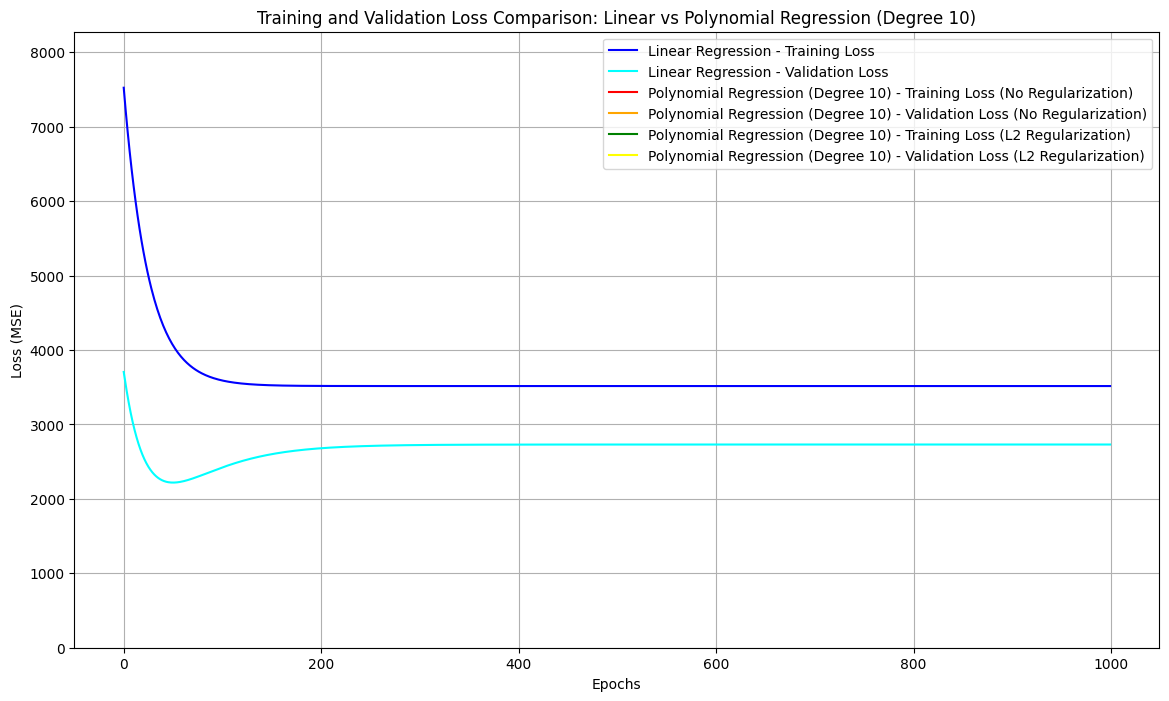

In [150]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=2)

X_train_poly = generate_polynomial_features(X_train, degree=10)
X_val_poly = generate_polynomial_features(X_val, degree=10)

def train_model(model, X_train, y_train, X_val, y_val, epochs=1000,
                learning_rate=0.01, weight_decay=0.0):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        model.eval()
        y_val_pred = model(X_val)
        val_loss = criterion(y_val_pred, y_val)

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    return train_losses, val_losses


poly_model = PolynomialModel(degree=11)
lin_model = LinearRegressionModel()

poly_train_losses, poly_val_losses = train_model(poly_model, X_train_poly, y_train, X_val_poly, y_val)
lin_train_losses, lin_val_losses = train_model(lin_model, X_train, y_train, X_val, y_val)
poly_l2_train_losses, poly_l2_val_losses = train_model(poly_model, X_train_poly, y_train, X_val_poly, y_val, weight_decay=0.01)

plt.figure(figsize=(14, 8))
plt.plot(lin_train_losses, label="Linear Regression - Training Loss", color='blue')
plt.plot(lin_val_losses, label="Linear Regression - Validation Loss", color='cyan')
plt.plot(poly_train_losses, label="Polynomial Regression (Degree 10) - Training Loss (No Regularization)", color='red')
plt.plot(poly_val_losses, label="Polynomial Regression (Degree 10) - Validation Loss (No Regularization)", color='orange')
plt.plot(poly_l2_train_losses, label="Polynomial Regression (Degree 10) - Training Loss (L2 Regularization)", color='green')
plt.plot(poly_l2_val_losses, label="Polynomial Regression (Degree 10) - Validation Loss (L2 Regularization)", color='yellow')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss Comparison: Linear vs Polynomial Regression (Degree 10)")
plt.legend()
plt.grid(True)
plt.ylim(0, max(np.max(lin_train_losses), np.max(poly_train_losses)) * 1.1)
plt.show()



## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


Result: a = 3.00, b = 4.01


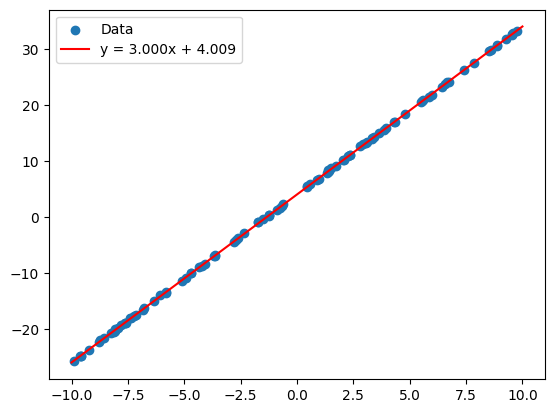

In [153]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

a = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

learning_rate = 0.01
num_epochs = 300

loss_history = []
for epoch in range(num_epochs):
    y_pred = a * X_tensor + b
    loss = torch.mean((y_tensor - y_pred) ** 2)
    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
    a.grad.zero_()
    b.grad.zero_()
    loss_history.append(loss.item())

print(f"Result: a = {a.item():.2f}, b = {b.item():.2f}")
X1 = torch.linspace(-10, 10, 100).unsqueeze(1)
y_pred_lin = a * X1 + b

plt.scatter(X, y, label='Data')
plt.plot(X1, y_pred_lin.detach(), color='red', label=f'y = {a.item():.3f}x + {b.item():.3f}')
plt.legend()
plt.show()

Training results are almost the same as those obtained using PyTorch's SGD optimizer. Even better.

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [154]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [156]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon


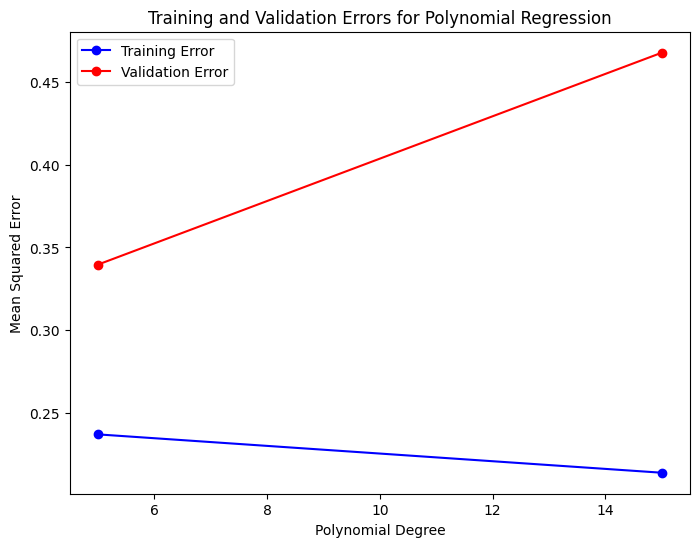

In [157]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

X_train_poly_5 = generate_polynomial_features(X_train, 5)
X_val_poly_5 = generate_polynomial_features(X_val, 5)

X_train_poly_15 = generate_polynomial_features(X_train, 15)
X_val_poly_15 = generate_polynomial_features(X_val, 15)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_and_evaluate(X_train_poly, y_train, X_val_poly, y_val):
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    return train_error, val_error

train_error_5, val_error_5 = train_and_evaluate(X_train_poly_5, y_train, X_val_poly_5, y_val)

train_error_15, val_error_15 = train_and_evaluate(X_train_poly_15, y_train, X_val_poly_15, y_val)

degrees = [5, 15]
train_errors = [train_error_5, train_error_15]
val_errors = [val_error_5, val_error_15]

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label="Training Error", marker='o', color='blue')
plt.plot(degrees, val_errors, label="Validation Error", marker='o', color='red')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Errors for Polynomial Regression")
plt.legend()
plt.show()


**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [160]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


Epoch [0/1000], Loss: 1.2781
Epoch [100/1000], Loss: 0.4131
Epoch [200/1000], Loss: 0.4069
Epoch [300/1000], Loss: 0.4068
Epoch [400/1000], Loss: 0.4068
Epoch [500/1000], Loss: 0.4068
Epoch [600/1000], Loss: 0.4068
Epoch [700/1000], Loss: 0.4068
Epoch [800/1000], Loss: 0.4068
Epoch [900/1000], Loss: 0.4068


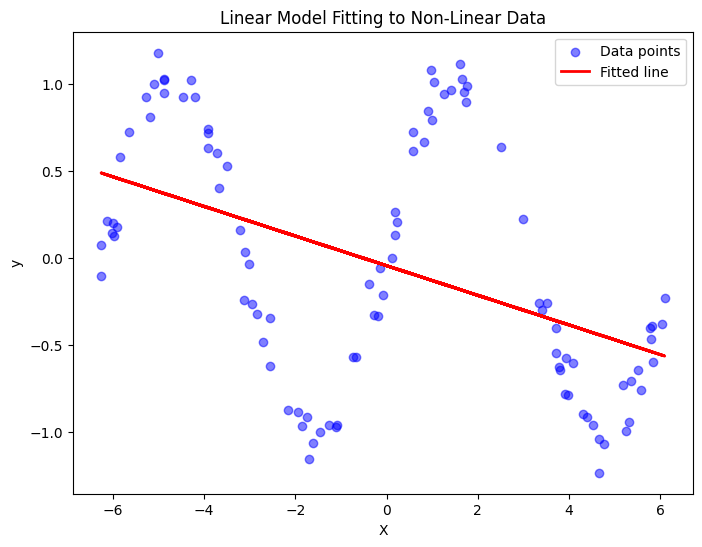

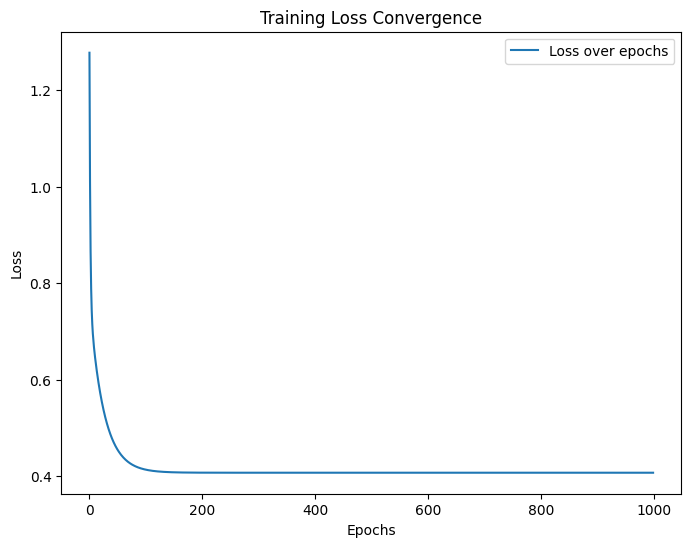

In [161]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = LinearRegressionModel()

learning_rate = 0.01
epochs = 1000
losses = []

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

# Training loop
for epoch in range(epochs):
    predictions = model(X_tensor)

    loss = criterion(predictions, y_tensor)
    losses.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

plt.figure(figsize=(8, 6))

plt.scatter(X, y, label="Data points", color='blue', alpha=0.5)


with torch.no_grad():
    y_pred = model(X_tensor)
    plt.plot(X, y_pred.numpy(), label="Fitted line", color='red', linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Model Fitting to Non-Linear Data")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(losses, label="Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Convergence")
plt.legend()
plt.show()